In [6]:
!pip install pandas seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [11]:
# Load Titanic dataset from seaborn's built-in datasets
df = sns.load_dataset('titanic')

# Display first 5 rows of the dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# Summary of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
# Drop columns that are not useful or have too many missing values
df = df.drop(columns=['deck', 'embark_town', 'alive'])

# Drop rows where 'embarked' or 'age' is missing
df = df.dropna(subset=['embarked', 'age'])

# Check cleaned dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


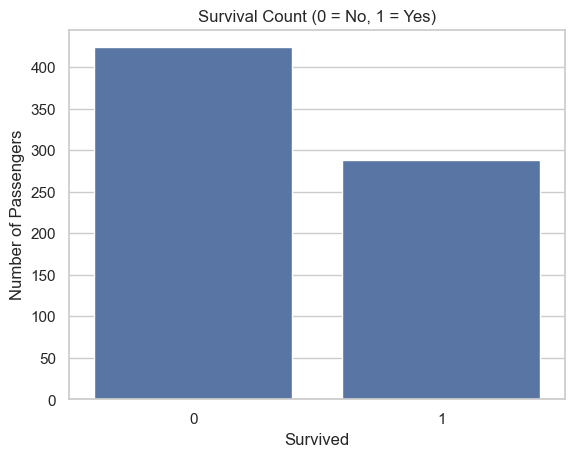

In [14]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.show()


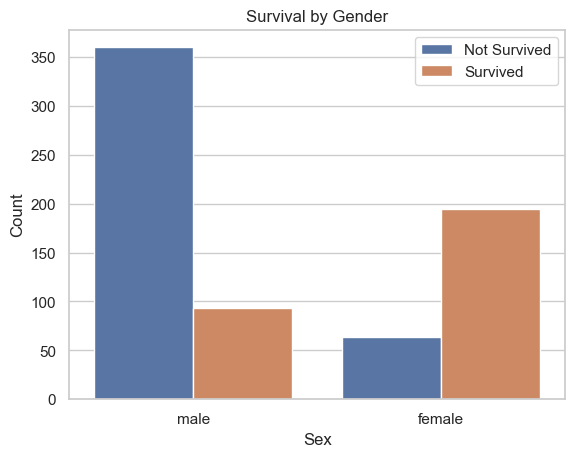

In [15]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


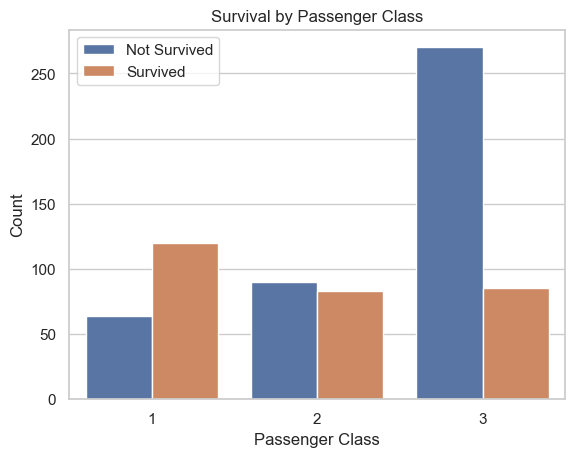

In [16]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


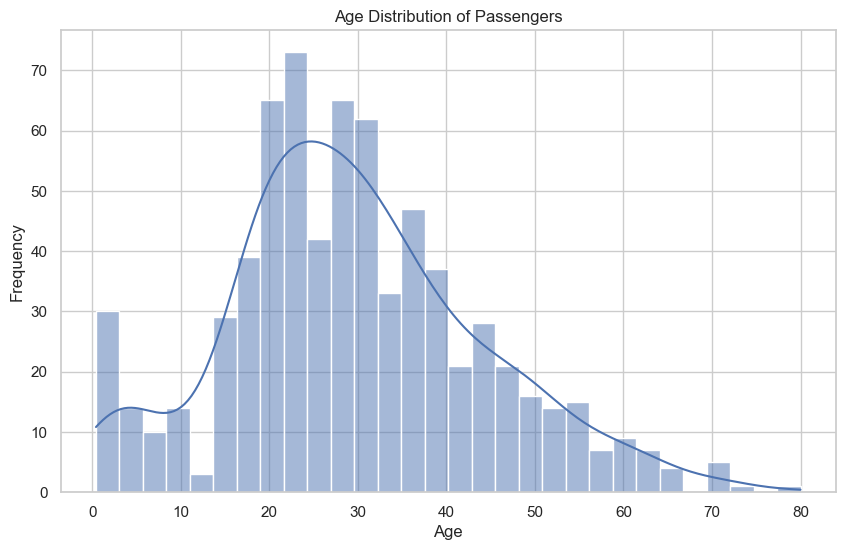

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


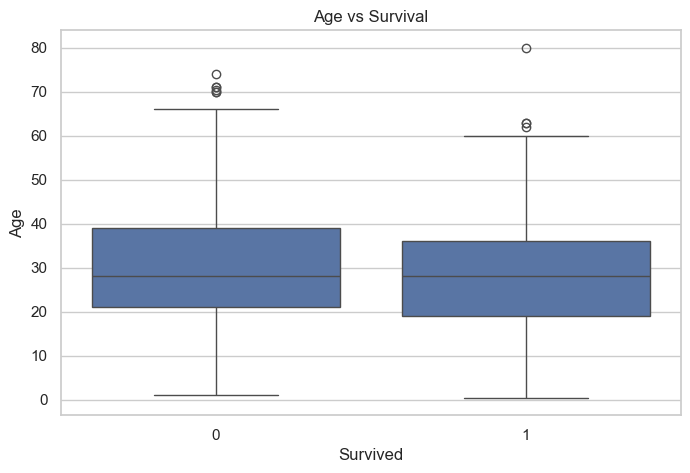

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


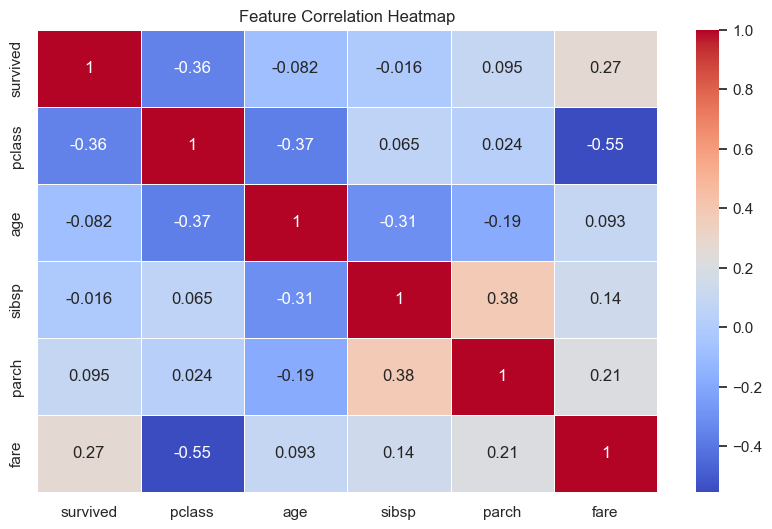

In [20]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [23]:
survival_gender = pd.crosstab(df['sex'], df['survived'])
print(survival_gender)


survived    0    1
sex               
female     64  195
male      360   93


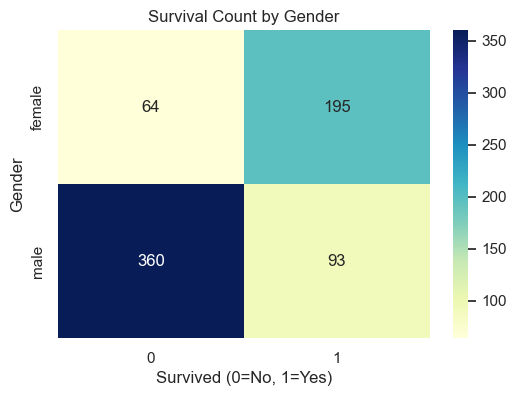

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(survival_gender, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Gender')
plt.show()


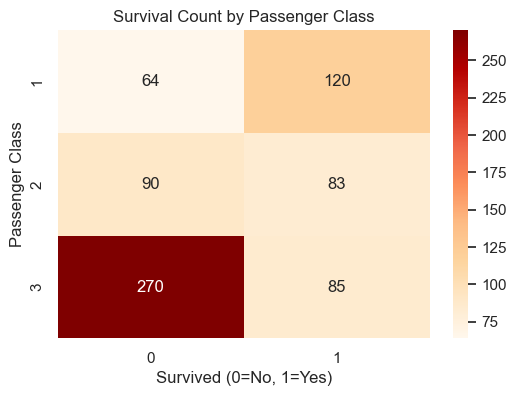

In [25]:
survival_class = pd.crosstab(df['pclass'], df['survived'])

plt.figure(figsize=(6,4))
sns.heatmap(survival_class, annot=True, fmt='d', cmap='OrRd')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Passenger Class')
plt.show()


### 📌 Conclusion:

- Most survivors were female.
- Passengers from 1st class had a higher survival rate.
- Younger passengers had slightly better survival chances.
- Gender and Class were strongly correlated with survival.
